In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
result_path = '../Data/result_df.csv'
movies_path = '../Data/movies_df.csv'
results = pd.read_csv(result_path)
movies = pd.read_csv(movies_path)

In [3]:
results.columns

Index(['Unnamed: 0', 'baseball glove', 'skis', 'truck', 'car', 'boat',
       'tvmonitor', 'sandwich', 'toothbrush', 'traffic light', 'apple',
       'suitcase', 'mouse', 'chair', 'cup', 'cow', 'bear', 'handbag',
       'parking meter', 'backpack', 'frisbee', 'pottedplant', 'bowl',
       'aeroplane', 'spoon', 'motorbike', 'fire hydrant', 'sofa', 'elephant',
       'snowboard', 'bed', 'scissors', 'teddy bear', 'hot dog', 'microwave',
       'bench', 'skateboard', 'kite', 'refrigerator', 'donut', 'carrot',
       'clock', 'hair drier', 'broccoli', 'vase', 'wine glass', 'laptop',
       'giraffe', 'bottle', 'tennis racket', 'banana', 'cat', 'bird', 'cake',
       'fork', 'train', 'knife', 'sheep', 'zebra', 'dog', 'oven', 'stop sign',
       'cell phone', 'baseball bat', 'umbrella', 'bicycle', 'orange', 'person',
       'tie', 'toilet', 'pizza', 'sink', 'remote', 'bus', 'horse', 'surfboard',
       'book', 'keyboard', 'diningtable', 'sports ball'],
      dtype='object')

In [4]:
results.columns = ['id', 'baseball glove', 'skis', 'truck', 'car', 'boat',
       'tvmonitor', 'sandwich', 'toothbrush', 'traffic light', 'apple',
       'suitcase', 'mouse', 'chair', 'cup', 'cow', 'bear', 'handbag',
       'parking meter', 'backpack', 'frisbee', 'pottedplant', 'bowl',
       'aeroplane', 'spoon', 'motorbike', 'fire hydrant', 'sofa', 'elephant',
       'snowboard', 'bed', 'scissors', 'teddy bear', 'hot dog', 'microwave',
       'bench', 'skateboard', 'kite', 'refrigerator', 'donut', 'carrot',
       'clock', 'hair drier', 'broccoli', 'vase', 'wine glass', 'laptop',
       'giraffe', 'bottle', 'tennis racket', 'banana', 'cat', 'bird', 'cake',
       'fork', 'train', 'knife', 'sheep', 'zebra', 'dog', 'oven', 'stop sign',
       'cell phone', 'baseball bat', 'umbrella', 'bicycle', 'orange', 'person',
       'tie', 'toilet', 'pizza', 'sink', 'remote', 'bus', 'horse', 'surfboard',
       'book', 'keyboard', 'diningtable', 'sports ball']

In [5]:
results.head()

,id,baseball glove,skis,truck,car,boat,tvmonitor,sandwich,toothbrush,traffic light,...,pizza,sink,remote,bus,horse,surfboard,book,keyboard,diningtable,sports ball
0,10003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
results.loc[results['id'] == 299537]

,id,baseball glove,skis,truck,car,boat,tvmonitor,sandwich,toothbrush,traffic light,...,pizza,sink,remote,bus,horse,surfboard,book,keyboard,diningtable,sports ball
4821,299537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
movies.head()

,Unnamed: 0,id,title,release_date,poster_path,Mystery,Animation,Music,History,Comedy,...,Horror,War,Documentary,TV Movie,Adventure,Drama,Western,Thriller,Action,Crime
0,0,299537,Captain Marvel,2019-03-06,/AtsgWhDnHTq68L0lLsUrCnM7TjG.jpg,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,166428,How to Train Your Dragon: The Hidden World,2019-01-03,/xvx4Yhf0DVH8G4LzNISpMfFBDy2.jpg,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,399579,Alita: Battle Angel,2019-01-31,/xRWht48C2V8XNfzvPehyClOvDni.jpg,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,3,450001,Master Z: Ip Man Legacy,2018-12-20,/2WfjB6FUDTIBVI2y02UGbnHR82s.jpg,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,338952,Fantastic Beasts: The Crimes of Grindelwald,2018-11-14,/fMMrl8fD9gRCFJvsx0SuFwkEOop.jpg,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
final = pd.merge(movies, results, on = 'id')

In [9]:
final.head()

,Unnamed: 0,id,title,release_date,poster_path,Mystery,Animation,Music,History,Comedy,...,pizza,sink,remote,bus,horse,surfboard,book,keyboard,diningtable,sports ball
0,0,299537,Captain Marvel,2019-03-06,/AtsgWhDnHTq68L0lLsUrCnM7TjG.jpg,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,166428,How to Train Your Dragon: The Hidden World,2019-01-03,/xvx4Yhf0DVH8G4LzNISpMfFBDy2.jpg,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,399579,Alita: Battle Angel,2019-01-31,/xRWht48C2V8XNfzvPehyClOvDni.jpg,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,450001,Master Z: Ip Man Legacy,2018-12-20,/2WfjB6FUDTIBVI2y02UGbnHR82s.jpg,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,338952,Fantastic Beasts: The Crimes of Grindelwald,2018-11-14,/fMMrl8fD9gRCFJvsx0SuFwkEOop.jpg,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
final.loc[final['title'] == 'Captain Marvel']

,Unnamed: 0,id,title,release_date,poster_path,Mystery,Animation,Music,History,Comedy,...,pizza,sink,remote,bus,horse,surfboard,book,keyboard,diningtable,sports ball
0,0,299537,Captain Marvel,2019-03-06,/AtsgWhDnHTq68L0lLsUrCnM7TjG.jpg,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
final.columns

Index(['Unnamed: 0', 'id', 'title', 'release_date', 'poster_path', 'Mystery',
       'Animation', 'Music', 'History', 'Comedy',
       ...
       'pizza', 'sink', 'remote', 'bus', 'horse', 'surfboard', 'book',
       'keyboard', 'diningtable', 'sports ball'],
      dtype='object', length=103)

In [12]:
final = final.drop(['Unnamed: 0'], axis = 1)

In [13]:
final = final.drop(['poster_path'], axis = 1)

In [14]:
final = final.drop(['release_date'], axis = 1)

In [15]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9928 entries, 0 to 9927
Data columns (total 100 columns):
id                 9928 non-null int64
title              9928 non-null object
Mystery            9928 non-null int64
Animation          9928 non-null int64
Music              9928 non-null int64
History            9928 non-null int64
Comedy             9928 non-null int64
Science Fiction    9928 non-null int64
Family             9928 non-null int64
Fantasy            9928 non-null int64
Romance            9928 non-null int64
Horror             9928 non-null int64
War                9928 non-null int64
Documentary        9928 non-null int64
TV Movie           9928 non-null int64
Adventure          9928 non-null int64
Drama              9928 non-null int64
Western            9928 non-null int64
Thriller           9928 non-null int64
Action             9928 non-null int64
Crime              9928 non-null int64
baseball glove     9928 non-null float64
skis               9928 non-nul

In [16]:
final

,id,title,Mystery,Animation,Music,History,Comedy,Science Fiction,Family,Fantasy,...,pizza,sink,remote,bus,horse,surfboard,book,keyboard,diningtable,sports ball
0,299537,Captain Marvel,0,0,0,0,0,1,0,0,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00
1,166428,How to Train Your Dragon: The Hidden World,0,1,0,0,0,0,1,0,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00
2,399579,Alita: Battle Angel,0,0,0,0,0,1,0,0,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00
3,450001,Master Z: Ip Man Legacy,0,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00
4,338952,Fantastic Beasts: The Crimes of Grindelwald,0,0,0,0,0,0,1,1,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00
5,324857,Spider-Man: Into the Spider-Verse,0,1,0,0,1,1,0,0,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00
6,400650,Mary Poppins Returns,0,0,0,0,1,0,1,1,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00
7,464504,A Madea Family Funeral,0,0,0,0,1,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00
8,297802,Aquaman,0,0,0,0,0,1,0,1,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00
9,512196,Happy Death Day 2U,1,0,0,0,1,1,0,0,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00


In [23]:
final_small = final[:100]

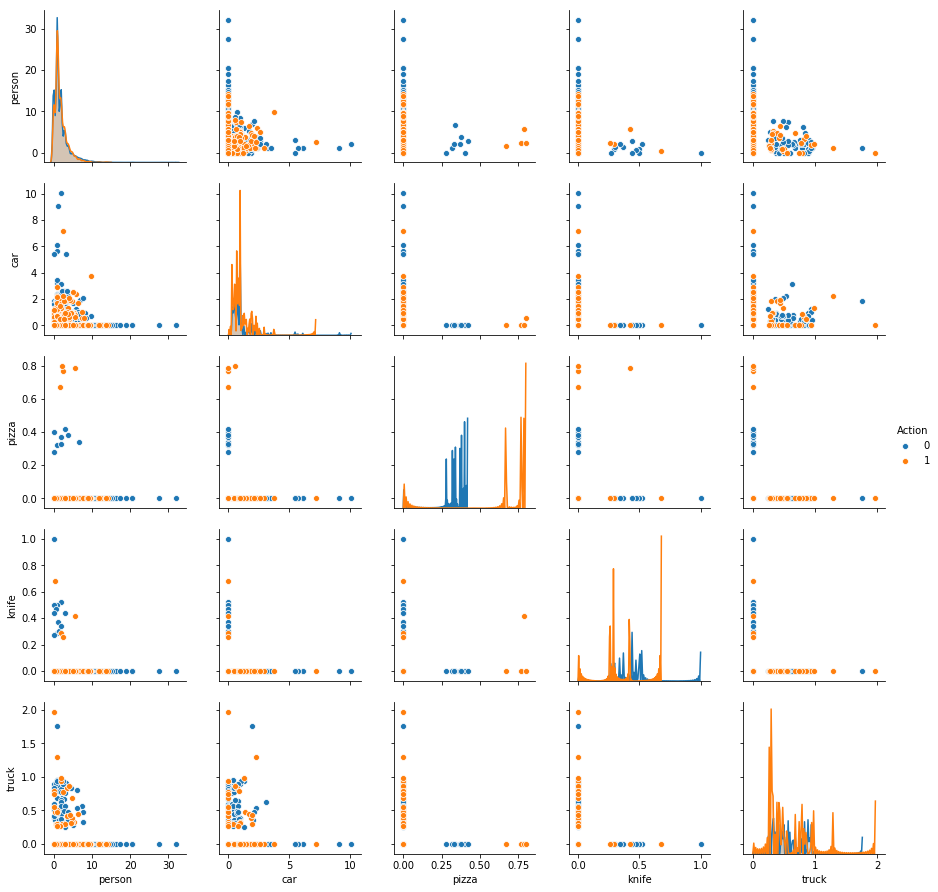

In [92]:
pair = sns.pairplot(final.drop(['title'],axis=1), vars = ['person','car', 'pizza','knife','truck'], hue= 'Action')

In [93]:
pair.savefig('pairplot.png')

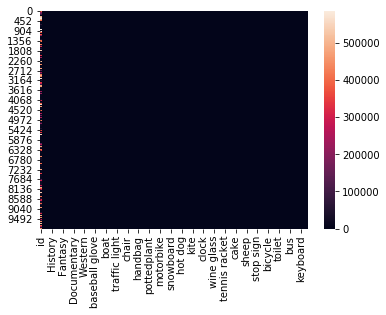

In [116]:
heat = sns.heatmap(final.drop(['title'],axis=1))

In [236]:
y = final.drop(final[['id','title']], axis = 1)
y = y[['Mystery', 'Animation', 'Music', 'History', 'Comedy', 'Science Fiction',
       'Family', 'Fantasy', 'Romance', 'Horror', 'War', 'Documentary',
       'TV Movie', 'Adventure', 'Drama', 'Western', 'Thriller', 'Action',
       'Crime']]

In [237]:
X = final.drop(final[['Mystery', 'Animation', 'Music', 'History', 'Comedy', 'Science Fiction',
       'Family', 'Fantasy', 'Romance', 'Horror', 'War', 'Documentary',
       'TV Movie', 'Adventure', 'Drama', 'Western', 'Thriller', 'Action',
       'Crime']], axis = 1)
X = X.drop(X[['title','id']], axis = 1)

In [238]:
y0 = y[['Mystery']]
y1 = y['Animation']
y2 = y['Music']
y3 = y['History']
y4 = y['Comedy']
y5 = y['Science Fiction']
y6 = y['Family']
y7 = y['Fantasy']
y8 = y['Romance']
y9 = y['Horror']
y10 = y['War']
y11 = y['Documentary']
y12 = y['TV Movie']
y13 = y['Adventure']
y14 = y['Drama']
y15 = y['Western']
y16 = y['Thriller'] 
y17 = y['Action']
y18 = y['Crime']

In [239]:
from sklearn.preprocessing import scale

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
X_scaled = scale(X)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [243]:
from sklearn.svm import SVC

In [244]:
X.shape

(9928, 79)

In [245]:
y.shape

(9928, 19)

In [246]:
from sklearn.multiclass import OneVsRestClassifier

In [247]:
model = OneVsRestClassifier(SVC(gamma='auto'))

In [248]:
model.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=None)

In [249]:
predicted = model.predict(X_test)

In [250]:
from sklearn.metrics import confusion_matrix, classification_report

In [251]:
print(f'{classification_report(y_test,predicted)}')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       279
           1       0.00      0.00      0.00       280
           2       0.00      0.00      0.00       104
           3       0.00      0.00      0.00       122
           4       0.63      0.16      0.26      1132
           5       0.00      0.00      0.00       358
           6       1.00      0.01      0.02       376
           7       0.00      0.00      0.00       350
           8       0.00      0.00      0.00       523
           9       0.00      0.00      0.00       398
          10       0.00      0.00      0.00       110
          11       0.00      0.00      0.00        59
          12       0.00      0.00      0.00        35
          13       0.00      0.00      0.00       539
          14       0.64      0.00      0.01      1525
          15       0.00      0.00      0.00        52
          16       0.00      0.00      0.00       851
          17       0.00    

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/p

### Long story short, that doesn't work very well

In [150]:
import pandas as pd
import numpy as np

In [151]:
movies_path = '../Data/movies_df.csv'

In [257]:
movies = pd.read_csv(movies_path)

In [258]:
movies.columns

Index(['Unnamed: 0', 'id', 'title', 'release_date', 'poster_path', 'Mystery',
       'Animation', 'Music', 'History', 'Comedy', 'Science Fiction', 'Family',
       'Fantasy', 'Romance', 'Horror', 'War', 'Documentary', 'TV Movie',
       'Adventure', 'Drama', 'Western', 'Thriller', 'Action', 'Crime'],
      dtype='object')

In [259]:
movies = movies.drop(['Unnamed: 0'], axis=1)

In [155]:
import itertools

In [266]:
from gensim.models import Word2Vec

In [267]:
from gensim.models import KeyedVectors

In [268]:
filename = '../GoogleNews-vectors-negative300.bin'

In [270]:
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [271]:
model.distance('captain','Action')

1.0166444028049453

In [272]:
model.distance('captain','adventure')

0.8721495594263002

In [273]:
model.distance('concubine','Romance')

0.8296327573503812

In [337]:
stoplist = set('for a of the and to in : &'.split())
punctuation = set('; / " . , :'.split())

In [444]:
def most_likely(title, genres = ['Mystery',
       'Animation', 'Music', 'History', 'Comedy', 'Science', 'Family',
       'Fantasy', 'Romance', 'Horror', 'War', 'Documentary', 'TV',
       'Adventure', 'Drama', 'Western', 'Thriller', 'Action', 'Crime']):
    
    broken_title = title.split(' ')

    print(broken_title)
    dists = []
    d = [0] * len(genres)
    for word in broken_title:
        if word.lower() in stoplist:
            continue
        
        else:
            for stop in punctuation:
                if stop in word:
                    word = word.split(stop)[0]
                
            for genre in genres:
                d[genres.index(genre)] += model.distance(word.lower(), genre)
            
    dists = [x / len(broken_title) for x in d]
    
    
    print(sorted(zip(dists,genres), reverse = False)[:3])

        
    

In [445]:
genres = ['Mystery',
       'Animation', 'Music', 'History', 'Comedy', 'Science', 'Family',
       'Fantasy', 'Romance', 'Horror', 'War', 'Documentary', 'TV',
       'Adventure', 'Drama', 'Western', 'Thriller', 'Action', 'Crime']

In [447]:
most_likely('how to train your dragon:',['Mystery',
       'Animation', 'Music', 'History', 'Comedy', 'Science', 'Family',
       'Fantasy', 'Romance', 'Horror', 'War', 'Documentary', 'TV',
       'Adventure', 'Drama', 'Western', 'Thriller', 'Action', 'Crime'])

['how', 'to', 'train', 'your', 'dragon:']
[(0.7306259445053478, 'Animation'), (0.7323483993429456, 'Horror'), (0.7340412899392667, 'Fantasy')]


### Text Analysis

In [448]:
def accuracy(title, genres, accuracy=1):
    broken_title = title.split(' ')

    # print(broken_title)
    dists = []
    d = [0] * len(genres)
    for word in broken_title:
        if word.lower() in stoplist:
            continue
        
        else:
            try:
                for stop in punctuation:
                    if stop in word:
                        word = word.split(stop)[0]
                
                for genre in genres:
                    d[genres.index(genre)] += model.distance(word.lower(), genre)
            except:
                continue
            
    dists = [x / len(broken_title) for x in d]
    
    
    best3 = sorted(zip(dists,genres), reverse = False)[:3]
    return title, best3
    

In [449]:
t, acc = accuracy('How to train your dragon:',genres)

In [450]:
pred = [acc[i][1] for i in range(len(acc))]

In [451]:
print(f'Movie Title: {t}\nPredictions: {pred}')

Movie Title: How to train your dragon:
Predictions: ['Animation', 'Horror', 'Fantasy']


In [443]:
# def get_genres(title):
#     if ((movies['title']== title)&(movies['Mystery'] == 0)):
#         print('nice')

In [424]:
# get_genres('Captain Marvel')